In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

In [286]:
df=pd.read_csv("dataset_FLD.csv")
df

,-6.672418458,-1.206198345,-1.081049865,0
0,1.675598,0.614994,-0.971600,0
1,-4.039058,0.335102,0.544618,1
2,0.793526,-0.235277,0.551771,1
3,3.820273,-0.274691,0.454743,1
4,-4.914811,1.232170,-0.663065,0
...,...,...,...,...
994,-3.680139,0.966962,-0.904337,0
995,-4.063900,0.802611,1.023708,1
996,-0.814430,-0.693945,0.876776,1
997,-0.325122,-0.759024,1.299772,1


In [287]:
#df[2]
#df[3]

In [288]:
def solve(m1,m2,std1,std2):
    # given inputs are mean and standard deviation of both the normal distribution 
    # function for finding roots of equations for normal distribution
    # this method is directly  taken from internet(stack overflow)
    a = 1/(2*std1**2) - 1/(2*std2**2)
    b = m2/(std2**2) - m1/(std1**2)
    c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
    d = np.roots([a,b,c])
    r=0
    for x in d:
        if m2<x and x<m1:
            r=x
    return r

In [289]:
#df 3
#df.to_csv("dataset_FLD.csv",header=None)

In [290]:
#helper
#def viz3d(data):
    #x=data.iloc[:,0]
    #y=data.iloc[:,1]
    #z=data.iloc[:,2]

    #fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')

    #ax.scatter(x,y,z,c=data.iloc[:,3],cmap="RdYlGn_r")
    #ax.set_xlabel("X")
    #ax.set_ylabel("Y")
    #ax.set_zlabel("Z")

In [291]:
def viz3d(data):
    print("PLOT IN 3D")
    x=data.iloc[:,0]
    y=data.iloc[:,1]
    z=data.iloc[:,2]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x,y,z,c=data.iloc[:,3],cmap="RdYlGn_r")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_xlim(-10,10)
    ax.set_ylim(-3,3)
    ax.set_zlim(-2,2)

    plt.show()

In [292]:
#df

In [293]:
def FLD(data):

    c1=data[data.iloc[:,3]==1] 
    c1=c1.iloc[:, [0,1,2]]
    m1=c1.mean(axis=0)
    sub1=c1-m1
    c2=data[data.iloc[:,3]==0]
    c2=c2.iloc[:, [0,1,2]]
    m2=c2.mean(axis=0)
    sub2=c2-m2
    mean=m2-m1
    print("The Mean Values:",mean)

    s1=np.dot(np.transpose(sub1),sub1)  
    #scatter matrix 1
    print("Scatter matrix of Class 1:",s1) 
    
    s2=np.dot(np.transpose(sub2),sub2)  
    #scatter matrix2
    print("Scatter matrix of Class 2:",s2)
    
    sw=np.add(s1,s2)                                   
    #scatter (1+2) 
    print("Sw=s1+s2=>",sw)

    swinv=np.linalg.inv(sw)                        
    #inverse of the sw using linear algebra methods 
    print("Swinv",swinv)
    #taking projection.

    w=np.dot(swinv,m1-m2)           
    print("The W vector",w)
    
    projc1=np.dot(w,np.transpose(c1))   #projection of class 1
    projc0=np.dot(w,np.transpose(c2))   #projection of class 0

    # caluculation of mean and standard deviation for each class seperately
    #class 1
    avg1=projc1.mean()
    #class 1
    std1=projc1.std()
    #class 2
    avg2=projc0.mean()
    std2=projc0.std()
    #mean of 1st class
    print("m1  projection:",avg1)
    #mean of 2nd class
    print("m2  projection:",avg2)
    #std deviaation of 1st class
    print("sig1  projection:",std1)
    #std deviation of 2nd class
    print("sig2  projection:",std2)
    
    
    x_all = np.arange(-0.05, 0.05, 0.001)
    y1=norm.pdf(x_all,avg1,std1)
    y0=norm.pdf(x_all,avg2,std2)

    result = solve(avg1,avg2,std1,std2)
    #value which seperates both the classes
    #the best point.
    print("The Deterministic Value :",result)  
    
    plt.figure(4)
    plt.plot(x_all,y0,c='g',label="class 0")
    plt.hist(projc0,bins=12,color="#7FFF7F")
    plt.xlabel("Projection line",fontsize="10")
    plt.ylabel("Density of points",fontsize="10")
    plt.xlim(-0.075, 0.075)
    plt.ylim(0,125)
    plt.legend()
    print("The Normal Plot of class 0: ")
    plt.show()
    
    plt.figure(3)
    plt.plot(x_all,y1,c='r',label="class 1")
    plt.hist(projc1,bins=25,color="#FF8989")
    plt.xlabel("projection line",fontsize="10")
    plt.ylabel("density of points",fontsize="10")
    plt.xlim(-0.075, 0.075)
    plt.ylim(0,125)
    plt.legend()
    print("The Normal Plot of class 1:")
    plt.show()
    
    plt.figure(2)
    plt.plot(x_all,y1,c='r',label="class 1")
    plt.hist(projc1,bins=25,color="#FF8989")
    plt.plot(x_all,y0,c='g',label="class 0")
    plt.hist(projc0,bins=12,color="#7FFF7F")
    plt.xlabel("projection line",fontsize="10")
    plt.ylabel("density of points",fontsize="10")
    yp= np.linspace(-0.03,0.03,1000)
    xp=result*np.ones((1000))
    #pery_vals = c + per * perx_vals
    plt.plot(xp, yp*1000, '--')
    plt.xlim(-0.075, 0.075)
    plt.ylim(0,125)
    plt.legend()
    print("Both classes on same graph with the intersection:")
    plt.show()
    
    
      

    #ploting the projected points
    #and finding the intersection.
    plt.figure(1)
    yp=0*projc1
    plt.scatter(projc1,yp,c='r',label="class 1")
    yp=0*projc0
    plt.scatter(projc0,yp,c='g',label="class 0")
    yp= np.linspace(-0.03,0.03,1000)
    xp=result*np.ones((1000))
    #pery_vals = c + per * perx_vals
    plt.plot(xp, yp*1000, '--')  
    plt.xlim(-0.075, 0.075)
    plt.ylim(-0.1,0.1)

    pdf1 = norm.pdf(c1, avg1, std1)
    #plt.plot(c1, pdf1) 

    pdf2 = norm.pdf(c2, avg2, std2)
    #plt.plot(c2, pdf2) 
    print("THE INTERSECTION:")
    plt.show()
    #plt.plot(c1,c1*0)
    #plt.plot(c2,c2*0)
    #plt.plot(c1, pdf1)
    #plt.plot(c2, pdf2)
    #plot3=plt.plot(result,norm.pdf(result,avg1,std1),'o')

    return w,result

PLOT IN 3D


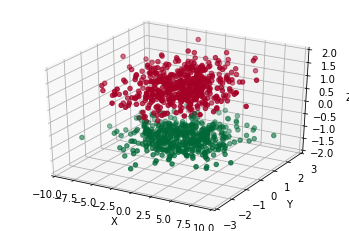

In [294]:
viz3d(df)

The Mean Values: -6.672418458   -0.107232
-1.206198345    0.103436
-1.081049865   -2.015249
dtype: float64
Scatter matrix of Class 1: [[4213.75649592    4.75321826   62.90465755]
 [   4.75321826  495.31648963   13.43656478]
 [  62.90465755   13.43656478   76.97468242]]
Scatter matrix of Class 2: [[ 4.80163222e+03 -1.12243717e+02 -4.56225550e-01]
 [-1.12243717e+02  4.89166664e+02 -6.47319136e-01]
 [-4.56225550e-01 -6.47319136e-01  1.27032747e+01]]
Sw=s1+s2=> [[9015.38871131 -107.49049832   62.448432  ]
 [-107.49049832  984.48315331   12.78924565]
 [  62.448432     12.78924565   89.67795715]]
Swinv [[ 1.11630631e-04  1.32227019e-05 -7.96211968e-05]
 [ 1.32227019e-05  1.01921300e-03 -1.54560863e-04]
 [-7.96211968e-05 -1.54560863e-04  1.12284999e-02]]
The W vector [-0.00014985 -0.00041548  0.02263567]
m1  projection: 0.022833656356045225
m2  projection: -0.022809747531608426
sig1  projection: 0.008825080132773661
sig2  projection: 0.0036649190562423766
The Deterministic Value : -0.00880220

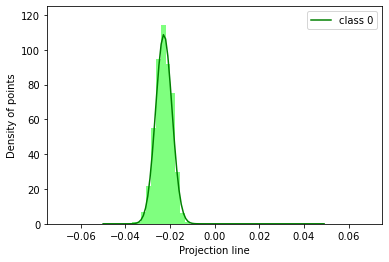

The Normal Plot of class 1:


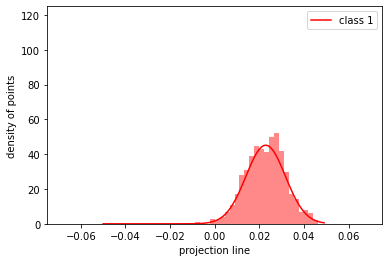

Both classes on same graph with the intersection:


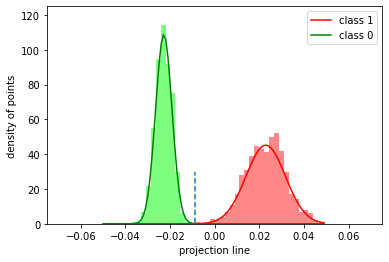

THE INTERSECTION:


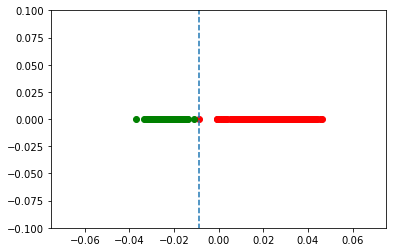

In [295]:
W, result = FLD(df)

In [296]:
#df3

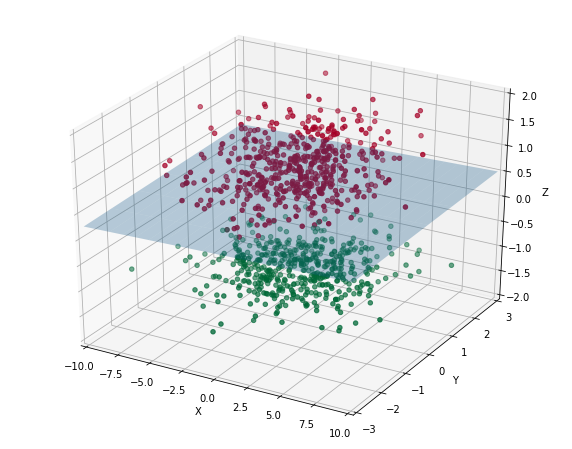

In [297]:
normal = W
d = result
x=df.iloc[:,0]
y=df.iloc[:,1]
z=df.iloc[:,2]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,c=df.iloc[:,3],cmap="RdYlGn_r")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(-10,10)
ax.set_ylim(-3,3)
ax.set_zlim(-2,2)

# create x,y
xx, yy = np.meshgrid(range(-10,11), range(-3,4))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the surface
ax.plot_surface(xx, yy, z, alpha=0.3)
plt.show()

In [298]:
#from scipy.stats import multivariate_normal
#from mpl_toolkits.mplot3d import Axes3D
#c1=data[data.iloc[:,3]==1] 
#c1=c1.iloc[:, [0,1,2]]
#Parameters to set
#mu_x = c1.iloc[:,0].mean()
#variance_x = c1.iloc[:,0].var()
#mu_y = c1.iloc[:,1].mean()
#variance_y = c1.iloc[:,1].var()
#mu_z = c1.iloc[:,2].mean()
#variance_z = c1.iloc[:,2].var()


#Create grid and multivariate normal
#x = np.linspace(-10,10,500)
#y = np.linspace(-10,10,500)
#z = np.linspace(-10,10,500)
#X, Y, Z = np.meshgrid(x,y, z)
#pos = np.empty(X.shape + (2,))
#pos[:, :, :, 0] = X; pos[:, :, 1] = Y
#rv = multivariate_normal([mu_x, mu_y, mu_z], [[variance_x, 0, 0], [0, variance_y, 0], [0,0,variance_z]])

